C:\Users\iwona\AppData\Local\Temp/ipykernel_23864/3346118779.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_guest_data["month"][el] = "Kwieceń"
C:\Users\iwona\AppData\Local\Temp/ipykernel_23864/3346118779.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_guest_data["month"][el] = "Sierpień"
C:\Users\iwona\AppData\Local\Temp/ipykernel_23864/3346118779.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_guest_dat

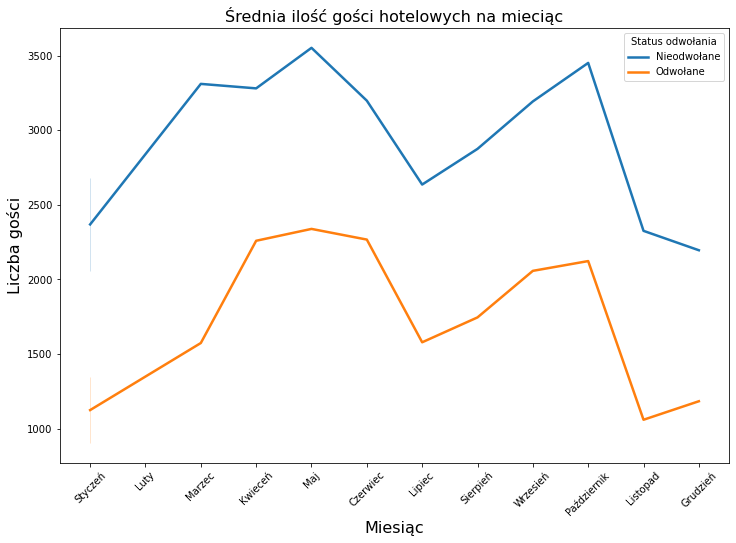

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
# tabela_glowna.isna().any()
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
tabela_glowna_cln = tabela_glowna.fillna(nan_replacements)

zero_guests = list(tabela_glowna_cln.loc[tabela_glowna_cln["adults"]
                   + tabela_glowna_cln["children"]
                   + tabela_glowna_cln["babies"]==0].index)
tabela_glowna_cln.drop(tabela_glowna_cln.index[zero_guests], inplace=True)

nodw = tabela_glowna_cln.loc[tabela_glowna_cln["is_canceled"] == 0]
odw = tabela_glowna_cln.loc[tabela_glowna_cln["is_canceled"] == 1]


nodw_monthly = nodw.groupby("arrival_date_month")["is_canceled"].count()
odw_monthly = odw.groupby("arrival_date_month")["is_canceled"].count()

nodw_data = pd.DataFrame({"month": list(nodw_monthly.index),
                    "Status odwołania": "Nieodwołane", 
                    "guests": list(nodw_monthly.values)})

odw_data = pd.DataFrame({"month": list(odw_monthly.index),
                    "Status odwołania": "Odwołane", 
                    "guests": list(odw_monthly.values)})
full_guest_data = pd.concat([nodw_data,odw_data], ignore_index=True)


for el in range(len(full_guest_data["month"])):
    if full_guest_data["month"][el] == 'January':
        full_guest_data["month"][el] = 'Styczeń'
    elif full_guest_data["month"][el] == "February":
        full_guest_data["month"][el] = "Styczeń"
    elif full_guest_data["month"][el] == "March":
        full_guest_data["month"][el] = "Marzec"
    elif full_guest_data["month"][el] == "April":
        full_guest_data["month"][el] = "Kwieceń"
    elif full_guest_data["month"][el] == "May":
        full_guest_data["month"][el] = "Maj"
    elif full_guest_data["month"][el] == "June":
        full_guest_data["month"][el] = "Czerwiec"
    elif full_guest_data["month"][el] == "July":
        full_guest_data["month"][el] = "Lipiec"
    elif full_guest_data["month"][el] == "August":
        full_guest_data["month"][el] = "Sierpień"
    elif full_guest_data["month"][el] == "September":
        full_guest_data["month"][el] = "Wrzesień"
    elif full_guest_data["month"][el] == "October":
        full_guest_data["month"][el] = "Październik"
    elif full_guest_data["month"][el] == "November":
        full_guest_data["month"][el] = "Listopad"
    elif full_guest_data["month"][el] == "December":
        full_guest_data["month"][el] = "Grudzień"


# ["January", "February", "March", "April", "May", "June", 
#           "July", "August", "September", "October", "November", "December"]

# order by month:
ordered_months = ["Styczeń", "Luty", "Marzec", "Kwieceń", "Maj", "Czerwiec", 
          "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "Lipiec") | (full_guest_data["month"] == "Sierpień"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "Lipiec") | (full_guest_data["month"] == "Sierpień")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="Status odwołania", data=full_guest_data, 
             hue_order = ["Nieodwołane", "Odwołane"], size="Status odwołania", sizes=(2.5, 2.5))
plt.title("Średnia ilość gości hotelowych na mieciąc", fontsize=16)
plt.xlabel("Miesiąc", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Liczba gości", fontsize=16)
plt.show()